# Customer Segregation in Airlines

### Steps Involved:
1. Problem Defination
2. Data Cleaning
3. Exploratory Data Analysis And Visualization
4. Predictive Analysis

### Step 1: Problem Defination:-
NZ Airlines has a frequent flyer program.NZA is in possession of a lot of data about the behavior of their FFP customers.

### Objective:
##### - To develop meaningful customer segments using the FFP behavior data using Clustering Method.
##### - NZA will use the profile and size of customer segments to develop appropriate marketing and promotional programs to improve their revenues, and satisfy their customers better.


###### Variable Description-

* FFP#-Frequent flyer program id
* AwardMiles-Balance number of miles eligible for award travel
* EliteMiles-Number of miles counted as qualifying for elite status
* PartnerMiles-Number of miles earned from transactions while using partner’s services in the past 12 months
* PartnerTrans-Number of transactions made at partner’s in the past 12 months
* FlyingReturnsMiles-Number of flight miles in the past 12 months
* FlightTrans-Number of flight transactions in the past 12 months
* EnrollDuration-Number of days since enrolled for FFP

- Balance = number of miles eligible for award travel 
- QualMiles = number of miles qualifying for TopFlight status 
- BonusMiles = number of miles earned from non-flight bonus transactions in the past 12 months
- BonusTrans = number of non-flight bonus transactions in the past 12 months 
- FlightMiles = number of flight miles in the past 12 months 
- FlightTrans = number of flight transactions in the past 12 months 
- DaysSinceEnroll = number of days since enrolled in the frequent flyer program

 Importing the necessary packages

In [1]:
# package to work with dataframe
import pandas as pd
# package to work n array
import numpy as np
# packages for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
# for standardizing the data
from sklearn.preprocessing import StandardScaler
# for K-means clustering
from sklearn import cluster
# to partition the data into training and validation dataset
from  sklearn.model_selection import train_test_split
# for Hierarchical Clustering and Dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
# Importing lubraryfor PCA
from sklearn.decomposition import PCA

### Step 2:Data Cleaning:-

In [2]:
data_with_ID=pd.read_excel("D:/IIT M BTCUBE/Advance Course/Assignment/ASS 10 Clustering/FrequentFlyerProgram.xls",sheet_name="Data")
data_with_ID.head()

FFP#  AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  \
0  1072       42040        1000         14189            17   
1  1502       30486           0             0             0   
2  2307       85496           0          2799             7   
3  3652        1884           0             0             0   
4   815       42044        2253         11433            10   

   FlyingReturnsMiles  FlightTrans  EnrollDuration  
0                4034           13            5717  
1                   0            0            5051  
2                2711            6            3820  
3                   0            0              31  
4                   0            0            6140

In [3]:
data_with_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   FFP#                3999 non-null   int64
 1   AwardMiles          3999 non-null   int64
 2   EliteMiles          3999 non-null   int64
 3   PartnerMiles        3999 non-null   int64
 4   PartnerTrans        3999 non-null   int64
 5   FlyingReturnsMiles  3999 non-null   int64
 6   FlightTrans         3999 non-null   int64
 7   EnrollDuration      3999 non-null   int64
dtypes: int64(8)
memory usage: 250.1 KB


Data read with correct dtypes

###### Checking for the Null values

In [4]:
data_with_ID.isnull().sum()

FFP#                  0
AwardMiles            0
EliteMiles            0
PartnerMiles          0
PartnerTrans          0
FlyingReturnsMiles    0
FlightTrans           0
EnrollDuration        0
dtype: int64

No Null values found

#### Checking duplicate records

In [5]:
data_with_ID[data_with_ID.duplicated(subset=['FFP#'], keep=False)]

Empty DataFrame
Columns: [FFP#, AwardMiles, EliteMiles, PartnerMiles, PartnerTrans, FlyingReturnsMiles, FlightTrans, EnrollDuration]
Index: []

No Duplicate Records found

In [6]:
data=data_with_ID.copy()
data

FFP#  AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  \
0     1072       42040        1000         14189            17   
1     1502       30486           0             0             0   
2     2307       85496           0          2799             7   
3     3652        1884           0             0             0   
4      815       42044        2253         11433            10   
...    ...         ...         ...           ...           ...   
3994  3962       40346           0          5412            13   
3995  1021       11449           0         24415            11   
3996  1271       71736           0         53602            25   
3997  3227       41247           0             0             0   
3998  2192       56693        3953         20454            11   

      FlyingReturnsMiles  FlightTrans  EnrollDuration  
0                   4034           13            5717  
1                      0            0            5051  
2                   2711            6            3820  
3                      0            0              31  
4                      0            0            6140  
...                  ...          ...             ...  
3994                   0            0            1483  
3995                   0            0            5864  
3996                  50            1            5485  
3997                   0            0            2407  
3998                   0            0            3893  

[3999 rows x 8 columns]

In [7]:
data.drop(['FFP#'],axis=1,inplace=True)
data.head()

AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  FlyingReturnsMiles  \
0       42040        1000         14189            17                4034   
1       30486           0             0             0                   0   
2       85496           0          2799             7                2711   
3        1884           0             0             0                   0   
4       42044        2253         11433            10                   0   

   FlightTrans  EnrollDuration  
0           13            5717  
1            0            5051  
2            6            3820  
3            0              31  
4            0            6140

In [8]:
features=list(data.columns)
print(features)

['AwardMiles', 'EliteMiles', 'PartnerMiles', 'PartnerTrans', 'FlyingReturnsMiles', 'FlightTrans', 'EnrollDuration']


In [9]:
round(data.describe(),2)

AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  FlyingReturnsMiles  \
count     3999.00     3999.00       3999.00        3999.0             3999.00   
mean     73601.33      144.11      17144.85          11.6              460.06   
std     100775.66      773.66      24150.97           9.6             1400.21   
min          0.00        0.00          0.00           0.0                0.00   
25%      18527.50        0.00       1250.00           3.0                0.00   
50%      43097.00        0.00       7171.00          12.0                0.00   
75%      92404.00        0.00      23800.50          17.0              311.00   
max    1704838.00    11148.00     263685.00          86.0            30817.00   

       FlightTrans  EnrollDuration  
count      3999.00         3999.00  
mean          1.37         4118.56  
std           3.79         2065.13  
min           0.00            2.00  
25%           0.00         2330.00  
50%           0.00         4096.00  
75%           1.00         5790.50  
max          53.00         8296.00

### Step 3: Exploratory Data Analysis And Visualization:-

#### Correlation

In [10]:
correlation=data.corr()
print(correlation)

                    AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  \
AwardMiles            1.000000    0.108722      0.403487      0.324935   
EliteMiles            0.108722    1.000000      0.031021      0.050725   
PartnerMiles          0.403487    0.031021      1.000000      0.603180   
PartnerTrans          0.324935    0.050725      0.603180      1.000000   
FlyingReturnsMiles    0.217551    0.126774      0.183536      0.377216   
FlightTrans           0.255700    0.144004      0.185261      0.432364   
EnrollDuration        0.263129    0.017312      0.210397      0.161262   

                    FlyingReturnsMiles  FlightTrans  EnrollDuration  
AwardMiles                    0.217551     0.255700        0.263129  
EliteMiles                    0.126774     0.144004        0.017312  
PartnerMiles                  0.183536     0.185261        0.210397  
PartnerTrans                  0.377216     0.432364        0.161262  
FlyingReturnsMiles            1.000000     0.869193      

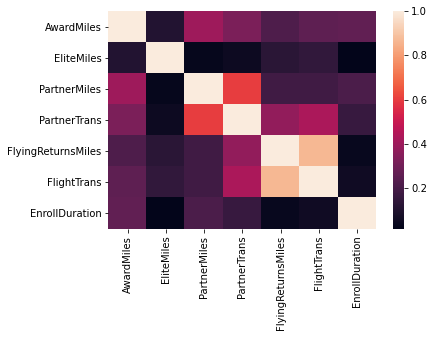

In [11]:
sns.heatmap(np.abs(correlation),xticklabels=correlation.columns,yticklabels=correlation.columns)
plt.show()

- FlyingReturnsMiles & FlightTrans are highly positively correlated implies as the FlightTrans increase there is a increase in FlyingReturnsMiles.
- There will be multicollinearity between the FlyingReturnsMiles & FlightTrans variables
- PartnerTrans & PartnerMiles are positively correlated implies as PartnerTrans increases  PartnerMiles also increases.
- No much correlation between any other variables

####  Visualization

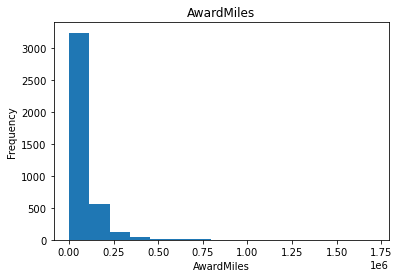

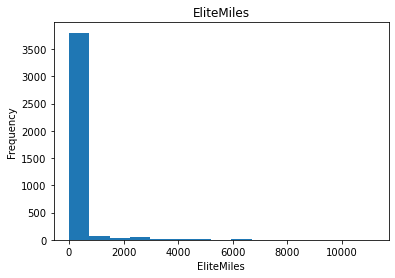

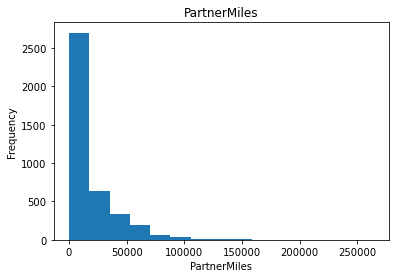

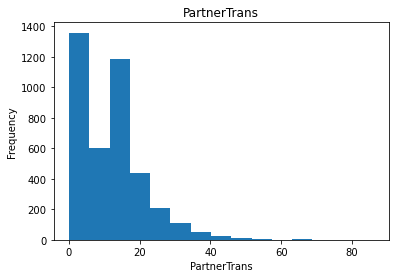

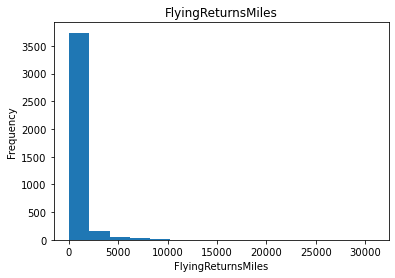

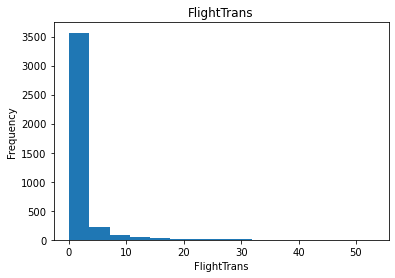

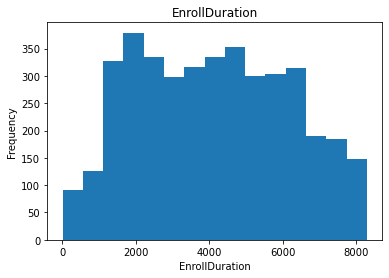

In [12]:
for item in features:
    data[item].plot(kind='hist',bins=15)
    plt.title(item)
    plt.xlabel(item)
    plt.show()

* AwardMiles shows 1 cluster
* EliteMiles shows 2 clusters
* PartnerMiles shows 1 cluster
* PartnerTrans shows 2 cluster
* FlyingReturnMiles shows 1 cluster
* FlihtTrans shows 1 cluster
* Enroll Duration shows normal distribution


##### Observation from the Scatter Plot

* There exsist different numbers of clusters (1,2,3) for the different pair of features.
* Few clusters are spherical and a few clusters are elliptial in shape.
* Mostly clusters are compact and a very few points are spread.

### Step 4: Predictive Analysis:-

## Outlier Detection

In [43]:
data4=data_with_ID.copy()

<AxesSubplot:>

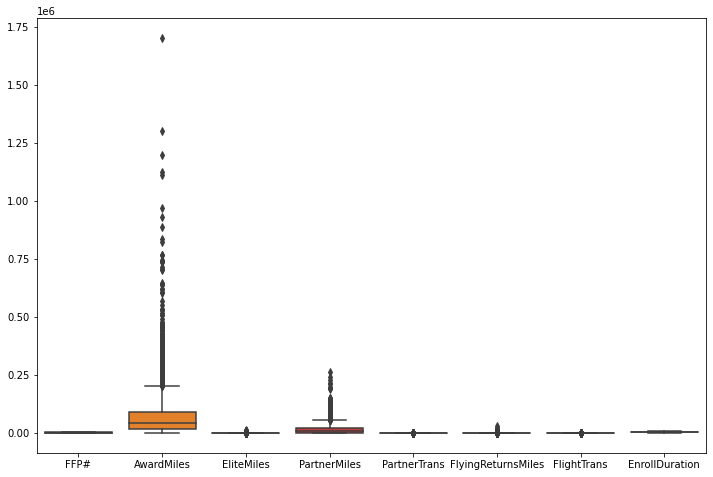

In [44]:
# Plotting all the variables together
plt.figure(figsize=(12,8))
sns.boxplot(data=data4)

##### Variable 'AwardMiles'

count       3999.00
mean       73601.33
std       100775.66
min            0.00
25%        18527.50
50%        43097.00
75%        92404.00
max      1704838.00
Name: AwardMiles, dtype: float64


<AxesSubplot:xlabel='AwardMiles', ylabel='Count'>

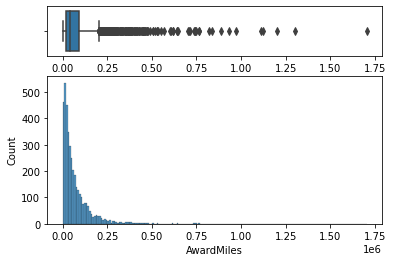

In [45]:
print(round(data4['AwardMiles'].describe(),2))
f,(ax_box, ax_hist)=plt.subplots(2,gridspec_kw={"height_ratios":(.25,.75)})
sns.boxplot(x=data4['AwardMiles'], ax=ax_box)
sns.histplot(x=data4['AwardMiles'],ax=ax_hist,kde=False)

In [46]:
Q1=data4['AwardMiles'].quantile(0.25)
Q3=data4['AwardMiles'].quantile(0.75)
IQR=Q3-Q1
print(f"IQR:{IQR}")
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(f"Lower Limit:{lower_limit}")
print(f"Upper Limit:{upper_limit}")
print(data4[(data4['AwardMiles']<lower_limit)|(data4['AwardMiles']>upper_limit)])

IQR:73876.5
Lower Limit:-92287.25
Upper Limit:203218.75
      FFP#  AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  \
6     3795      822321           0        138334            26   
11     714      242910        1115        103935            18   
22    2610      211773           0         23256            30   
37     433      491987           0         68007            23   
42    3120      214674           0         25688            23   
...    ...         ...         ...           ...           ...   
3829   170      402874           0         74800            15   
3841  1672      642756           0         37889            15   
3845  1781      431824           0         30480            16   
3852   294      568174           0         67121            16   
3971  3777      221543           0         10300             5   

      FlyingReturnsMiles  FlightTrans  EnrollDuration  
6                    600            2            3288  
11                   500            1  

In [47]:
df1=data4[(data4['AwardMiles']>lower_limit) & (data4['AwardMiles']<upper_limit)]
df1.shape

(3733, 8)

<AxesSubplot:>

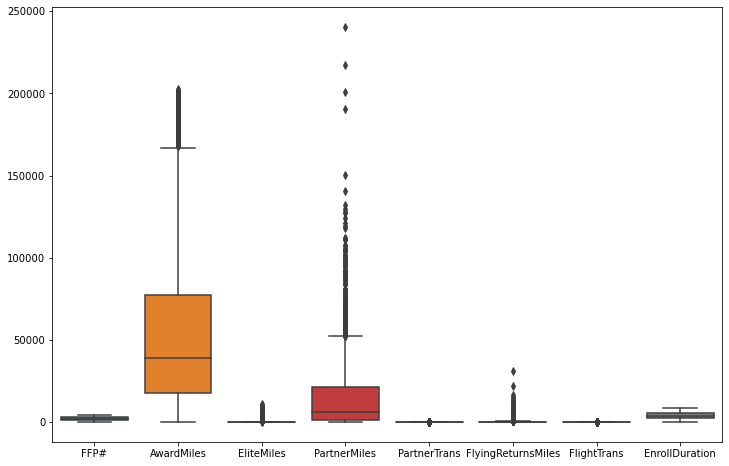

In [48]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1)

AwardMiles
- mean> median-  Right Skewed distribution
- 266 records out of 3999 records are Outliers 

##### Variable 'PartnerMiles'

count      3999.00
mean      17144.85
std       24150.97
min           0.00
25%        1250.00
50%        7171.00
75%       23800.50
max      263685.00
Name: PartnerMiles, dtype: float64


<AxesSubplot:xlabel='PartnerMiles', ylabel='Count'>

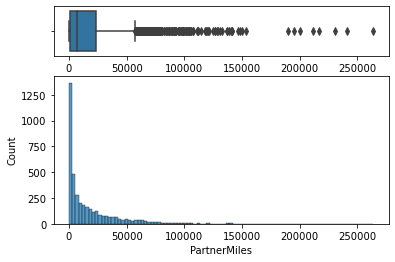

In [49]:
print(round(data4['PartnerMiles'].describe(),2))
f,(ax_box, ax_hist)=plt.subplots(2,gridspec_kw={"height_ratios":(.25,.75)})
sns.boxplot(x=data4['PartnerMiles'], ax=ax_box)
sns.histplot(x=data4['PartnerMiles'],ax=ax_hist,kde=False)

In [50]:
    Q1=data4['PartnerMiles'].quantile(0.25)
    Q3=data4['PartnerMiles'].quantile(0.75)
    IQR=Q3-Q1
    print(f"IQR:{IQR}")
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    print(f"Lower Limit:{lower_limit}")
    print(f"Upper Limit:{upper_limit}")
    print(data4[(data4['PartnerMiles']<lower_limit)|(data4['PartnerMiles']>upper_limit)])

IQR:22550.5
Lower Limit:-32575.75
Upper Limit:57626.25
      FFP#  AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  \
6     3795      822321           0        138334            26   
11     714      242910        1115        103935            18   
37     433      491987           0         68007            23   
59    1617      404142           0         75509            13   
77    1544       57857        1099         62650            37   
...    ...         ...         ...           ...           ...   
3872  2875       66466           0         86952            22   
3879  1011      141491           0         63060             6   
3905  1058      138368           0         68663            13   
3950   875       56606        3818         61634            14   
3988  2294       98895           0         89709            17   

      FlyingReturnsMiles  FlightTrans  EnrollDuration  
6                    600            2            3288  
11                   500            1   

PartnerMiles
- mean> median-  Right Skewed distribution
- 280 records out of 3999 records are Outliers 

In [51]:
df2=df1[(df1['PartnerMiles']>lower_limit) & (df1['PartnerMiles']<upper_limit)]
df2.shape

(3522, 8)

<AxesSubplot:>

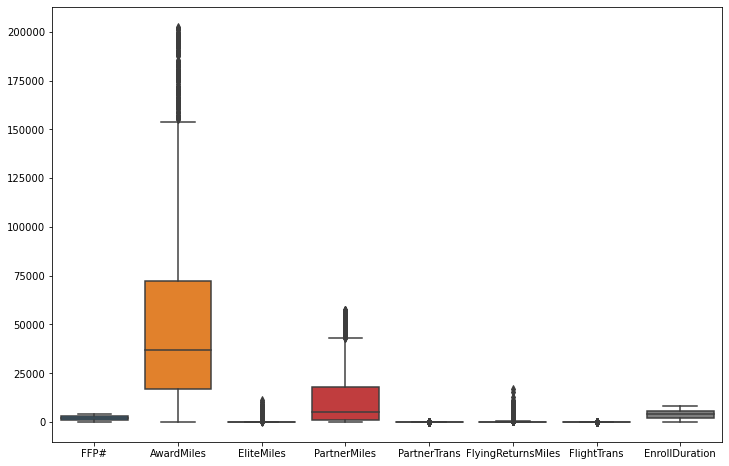

In [52]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df2)

##### Variable 'FlyingReturnsMiles'

count     3999.00
mean       460.06
std       1400.21
min          0.00
25%          0.00
50%          0.00
75%        311.00
max      30817.00
Name: FlyingReturnsMiles, dtype: float64


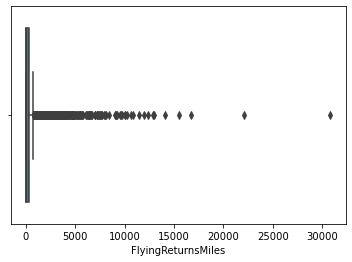

In [53]:
print(round(data4['FlyingReturnsMiles'].describe(),2))
sns.boxplot(x=data4['FlyingReturnsMiles'])
plt.show()

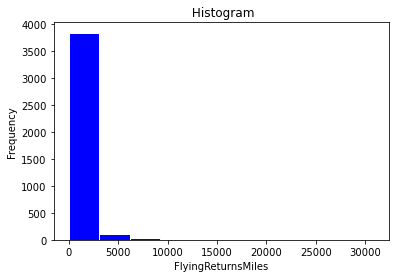

In [54]:
plt.hist(data4['FlyingReturnsMiles'], color= 'blue', edgecolor='white')
plt.title(" Histogram")
plt.xlabel('FlyingReturnsMiles')
plt.ylabel('Frequency')
plt.show()

In [55]:
    Q1=data4['FlyingReturnsMiles'].quantile(0.25)
    Q3=data4['FlyingReturnsMiles'].quantile(0.75)
    IQR=Q3-Q1
    print(f"IQR:{IQR}")
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    print(f"Lower Limit:{lower_limit}")
    print(f"Upper Limit:{upper_limit}")
    print(data4[(data4['FlyingReturnsMiles']<lower_limit)|(data4['FlyingReturnsMiles']>upper_limit)])

IQR:311.0
Lower Limit:-466.5
Upper Limit:777.5
      FFP#  AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  \
0     1072       42040        1000         14189            17   
2     2307       85496           0          2799             7   
9      250      176090           0          5300             9   
27    1533       70464           0          4000             4   
31    2397       48806           0         12600            10   
...    ...         ...         ...           ...           ...   
3940   148      100640           0          7600             8   
3942  3279      123055           0         11564             5   
3946  1045       33835           0          2280             7   
3947  1033       66015           0         26706            30   
3989  1811       17609           0           803             5   

      FlyingReturnsMiles  FlightTrans  EnrollDuration  
0                   4034           13            5717  
2                   2711            6           

FlyingReturnsMiles
- less than 50%  of the Customers are having 0 FlyingReturnsMiles
- This implies that 50% of the Customers Number of flight miles in the past 12 months is zero. They are not frequently flying customers.
- 569 records out of 3999 records are Outliers 

In [56]:
df3=df2[(df2['FlyingReturnsMiles']>lower_limit) & (df2['FlyingReturnsMiles']<upper_limit)]
df3.shape

(3105, 8)

<AxesSubplot:>

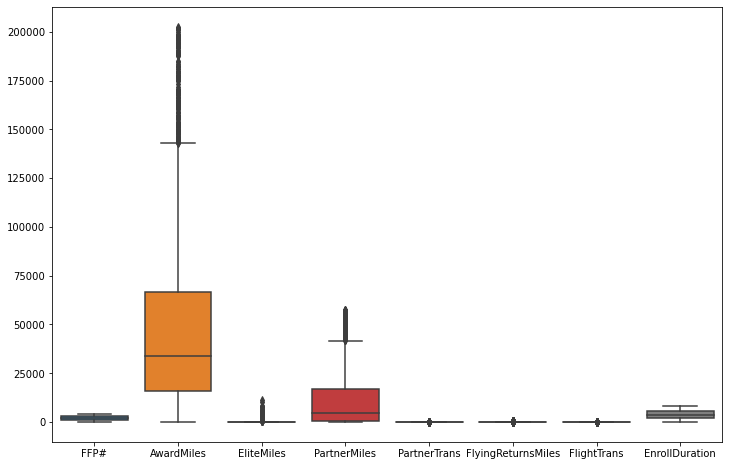

In [57]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df3)

##### Variable 'EliteMiles'

count     3999.00
mean       144.11
std        773.66
min          0.00
25%          0.00
50%          0.00
75%          0.00
max      11148.00
Name: EliteMiles, dtype: float64


<AxesSubplot:xlabel='EliteMiles', ylabel='Count'>

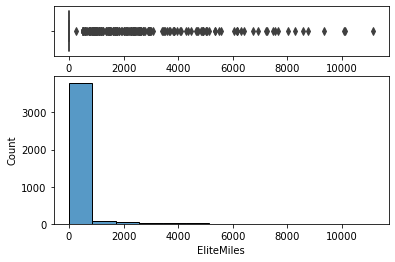

In [58]:
print(round(data4['EliteMiles'].describe(),2))
f,(ax_box, ax_hist)=plt.subplots(2,gridspec_kw={"height_ratios":(.25,.75)})
sns.boxplot(x=data4['EliteMiles'], ax=ax_box)
sns.histplot(x=data4['EliteMiles'],ax=ax_hist,kde=False)

In [59]:
    Q1=data4['EliteMiles'].quantile(0.25)
    Q3=data4['EliteMiles'].quantile(0.75)
    IQR=Q3-Q1
    print(f"IQR:{IQR}")
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    print(f"Lower Limit:{lower_limit}")
    print(f"Upper Limit:{upper_limit}")
    print(data4[(data4['EliteMiles']<lower_limit)|(data4['EliteMiles']>upper_limit)])

IQR:0.0
Lower Limit:0.0
Upper Limit:0.0
      FFP#  AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  \
0     1072       42040        1000         14189            17   
4      815       42044        2253         11433            10   
7     2657      145214        1692          3500             4   
11     714      242910        1115        103935            18   
32    1974       19896        2395          9866            11   
...    ...         ...         ...           ...           ...   
3894   596      133445        8264          3375            13   
3906  1744      199418        1000         25590            39   
3950   875       56606        3818         61634            14   
3980   720       23553         810          1587             4   
3998  2192       56693        3953         20454            11   

      FlyingReturnsMiles  FlightTrans  EnrollDuration  
0                   4034           13            5717  
4                      0            0            6140  

EliteMiles
- 75% of the Customers are having 0 EliteMiles
- 226 records out of 3999 records are Outliers 

In [60]:
df4=df3[(df3['EliteMiles']>lower_limit) & (df3['EliteMiles']<upper_limit)]
df4.shape

(0, 8)

<AxesSubplot:>

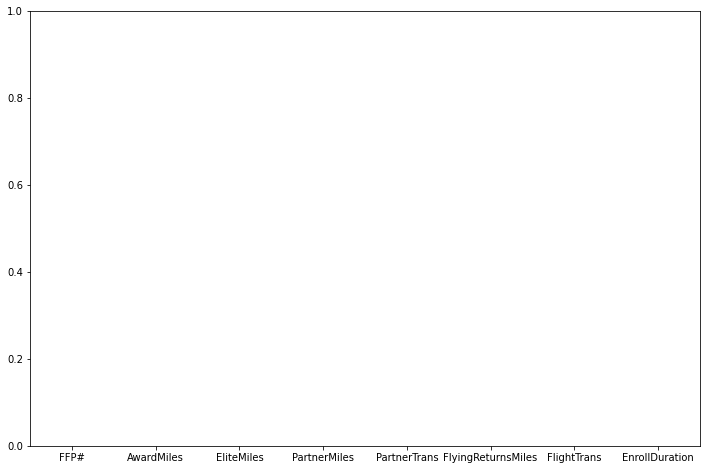

In [61]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df4)

We shall not consider the EliteMiles for removing the outliers as it could lead to removing a higher no. of records which can lead to loss of information.

<AxesSubplot:>

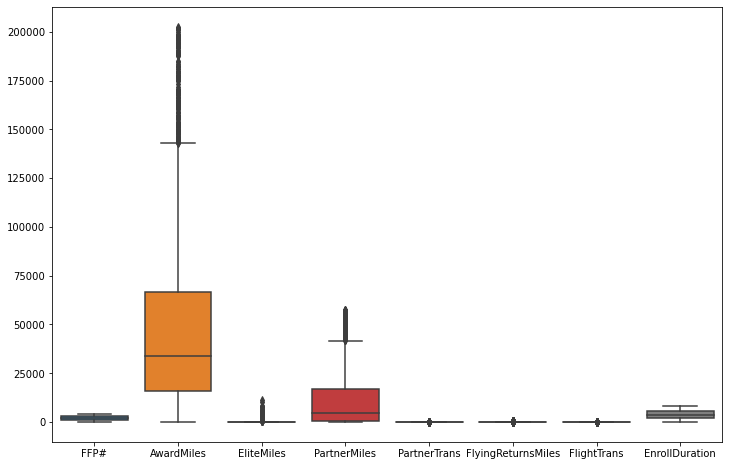

In [62]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df3)

Looking in above plot rest all outliers we shall leave as it could lead to loss of lot of information

Hence, we shall consider the df3 dataframe for analysis after removing outliers.

In [63]:
df3

FFP#  AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  \
1     1502       30486           0             0             0   
3     3652        1884           0             0             0   
4      815       42044        2253         11433            10   
5     3611       12675           0          4875            25   
7     2657      145214        1692          3500             4   
...    ...         ...         ...           ...           ...   
3994  3962       40346           0          5412            13   
3995  1021       11449           0         24415            11   
3996  1271       71736           0         53602            25   
3997  3227       41247           0             0             0   
3998  2192       56693        3953         20454            11   

      FlyingReturnsMiles  FlightTrans  EnrollDuration  
1                      0            0            5051  
3                      0            0              31  
4                      0            0            6140  
5                      0            0            1390  
7                    500            1            2560  
...                  ...          ...             ...  
3994                   0            0            1483  
3995                   0            0            5864  
3996                  50            1            5485  
3997                   0            0            2407  
3998                   0            0            3893  

[3105 rows x 8 columns]

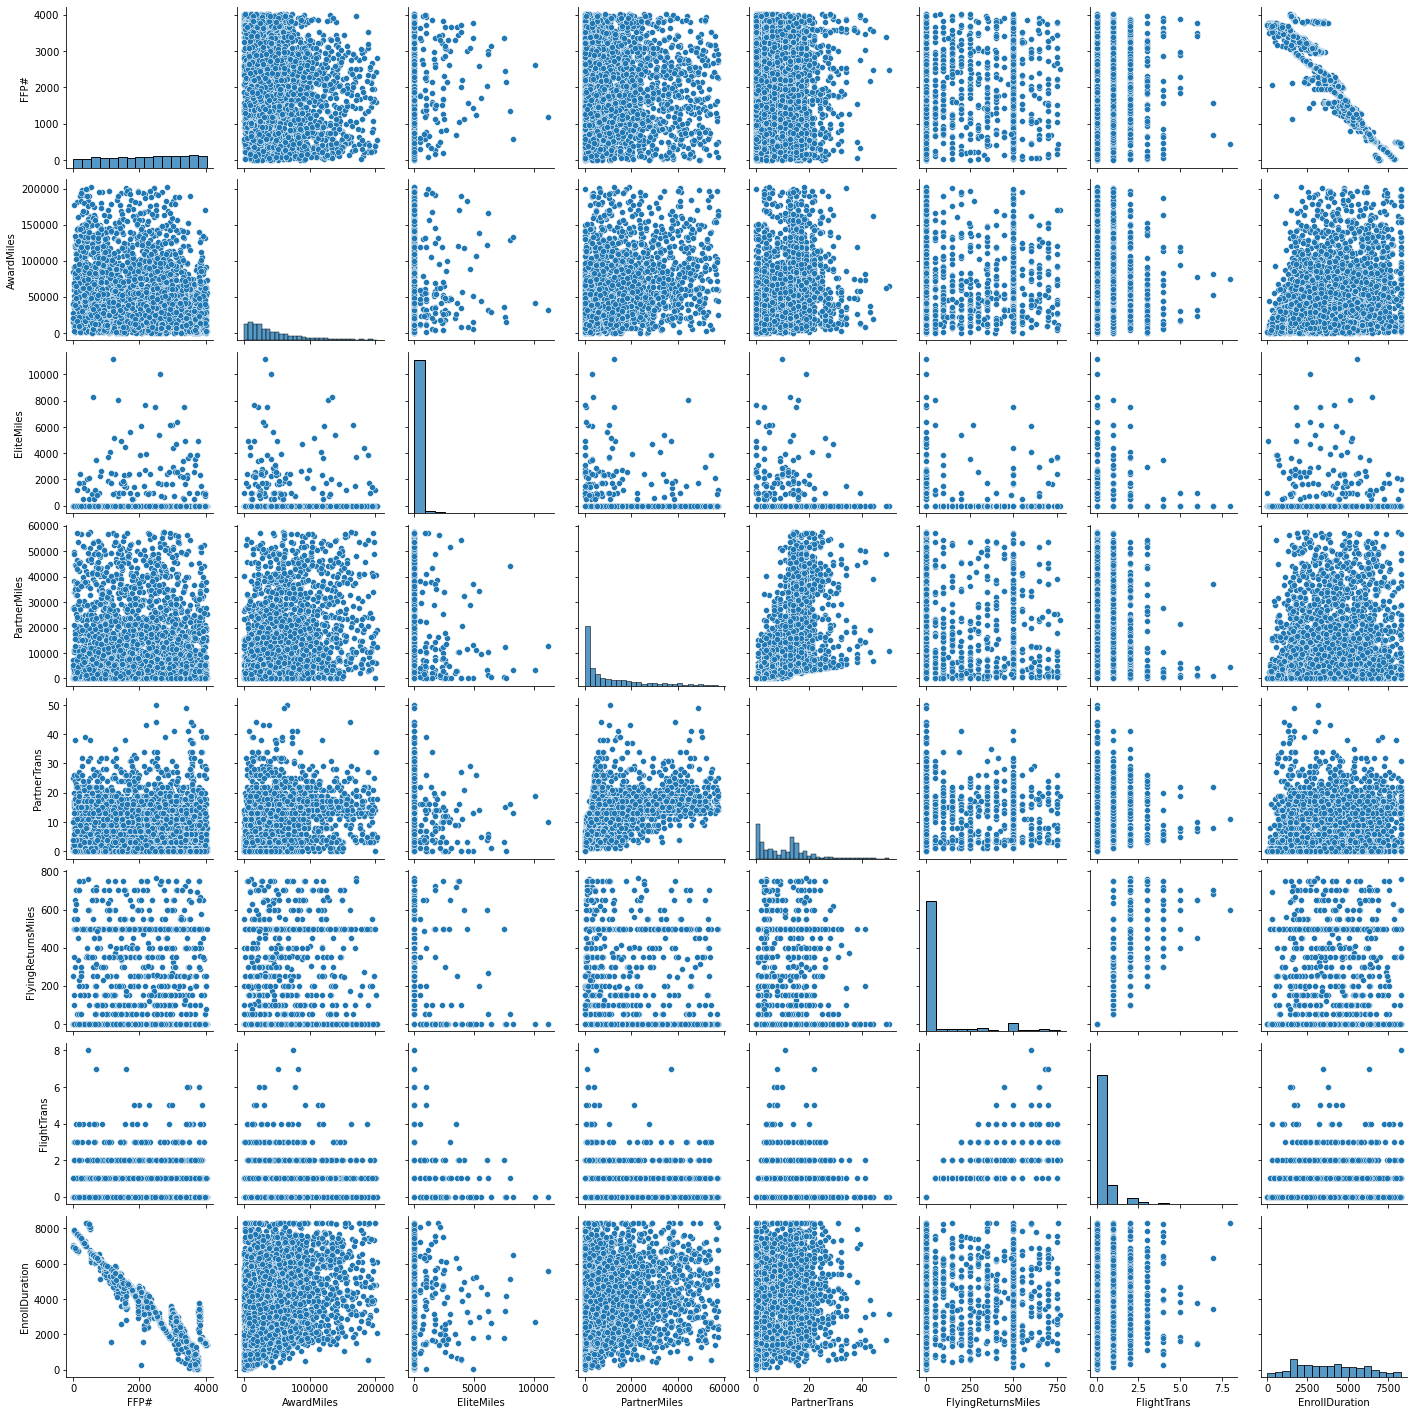

In [64]:
sns.pairplot(df3)
plt.show()

##### Observation from the Scatter Plot

* There exsist different numbers of clusters (upto 6) for the different pair of features.
* Few clusters are spherical and a mostly clusters are elliptial in shape.
* Mostly variables show compact clusters and a many variables show spread in the clusters.

In [65]:
df=df3.copy()
df['row_num'] = df.reset_index().index
df


FFP#  AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  \
1     1502       30486           0             0             0   
3     3652        1884           0             0             0   
4      815       42044        2253         11433            10   
5     3611       12675           0          4875            25   
7     2657      145214        1692          3500             4   
...    ...         ...         ...           ...           ...   
3994  3962       40346           0          5412            13   
3995  1021       11449           0         24415            11   
3996  1271       71736           0         53602            25   
3997  3227       41247           0             0             0   
3998  2192       56693        3953         20454            11   

      FlyingReturnsMiles  FlightTrans  EnrollDuration  row_num  
1                      0            0            5051        0  
3                      0            0              31        1  
4                      0            0            6140        2  
5                      0            0            1390        3  
7                    500            1            2560        4  
...                  ...          ...             ...      ...  
3994                   0            0            1483     3100  
3995                   0            0            5864     3101  
3996                  50            1            5485     3102  
3997                   0            0            2407     3103  
3998                   0            0            3893     3104  

[3105 rows x 9 columns]

In [66]:
df.set_index("row_num", inplace = True)

In [67]:
# For labeling purpose
df_wo=df.copy()
df_wo

FFP#  AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  \
row_num                                                             
0        1502       30486           0             0             0   
1        3652        1884           0             0             0   
2         815       42044        2253         11433            10   
3        3611       12675           0          4875            25   
4        2657      145214        1692          3500             4   
...       ...         ...         ...           ...           ...   
3100     3962       40346           0          5412            13   
3101     1021       11449           0         24415            11   
3102     1271       71736           0         53602            25   
3103     3227       41247           0             0             0   
3104     2192       56693        3953         20454            11   

         FlyingReturnsMiles  FlightTrans  EnrollDuration  
row_num                                                   
0                         0            0            5051  
1                         0            0              31  
2                         0            0            6140  
3                         0            0            1390  
4                       500            1            2560  
...                     ...          ...             ...  
3100                      0            0            1483  
3101                      0            0            5864  
3102                     50            1            5485  
3103                      0            0            2407  
3104                      0            0            3893  

[3105 rows x 8 columns]

In [68]:
df_wo.drop('FFP#',axis=1,inplace=True)
df_wo

AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  \
row_num                                                       
0             30486           0             0             0   
1              1884           0             0             0   
2             42044        2253         11433            10   
3             12675           0          4875            25   
4            145214        1692          3500             4   
...             ...         ...           ...           ...   
3100          40346           0          5412            13   
3101          11449           0         24415            11   
3102          71736           0         53602            25   
3103          41247           0             0             0   
3104          56693        3953         20454            11   

         FlyingReturnsMiles  FlightTrans  EnrollDuration  
row_num                                                   
0                         0            0            5051  
1                         0            0              31  
2                         0            0            6140  
3                         0            0            1390  
4                       500            1            2560  
...                     ...          ...             ...  
3100                      0            0            1483  
3101                      0            0            5864  
3102                     50            1            5485  
3103                      0            0            2407  
3104                      0            0            3893  

[3105 rows x 7 columns]

In [69]:
#features=df.columns
#features

##### Standardization

In [70]:
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df_wo)
df_norm=pd.DataFrame(df_norm,columns=features)
df_wo_kmeans=df_norm.copy()
df_wo_kmeans

AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  FlyingReturnsMiles  \
0      -0.399340   -0.150235     -0.800206     -1.199405           -0.414957   
1      -1.063842   -0.150235     -0.800206     -1.199405           -0.414957   
2      -0.130817    3.373358      0.027542      0.053675           -0.414957   
3      -0.813138   -0.150235     -0.447256      1.933295           -0.414957   
4       2.266102    2.495979     -0.546806     -0.698173            2.526287   
...          ...         ...           ...           ...                 ...   
3100   -0.170266   -0.150235     -0.408378      0.429599           -0.414957   
3101   -0.841621   -0.150235      0.967437      0.178983           -0.414957   
3102    0.559009   -0.150235      3.080573      1.933295           -0.120833   
3103   -0.149333   -0.150235     -0.800206     -1.199405           -0.414957   
3104    0.209519    6.032084      0.680661      0.178983           -0.414957   

      FlightTrans  EnrollDuration  
0       -0.391769        0.550998  
1       -0.391769       -1.903078  
2       -0.391769        1.083366  
3       -0.391769       -1.238717  
4        0.939132       -0.666752  
...           ...             ...  
3100    -0.391769       -1.193254  
3101    -0.391769        0.948441  
3102     0.939132        0.763163  
3103    -0.391769       -0.741547  
3104    -0.391769       -0.015101  

[3105 rows x 7 columns]

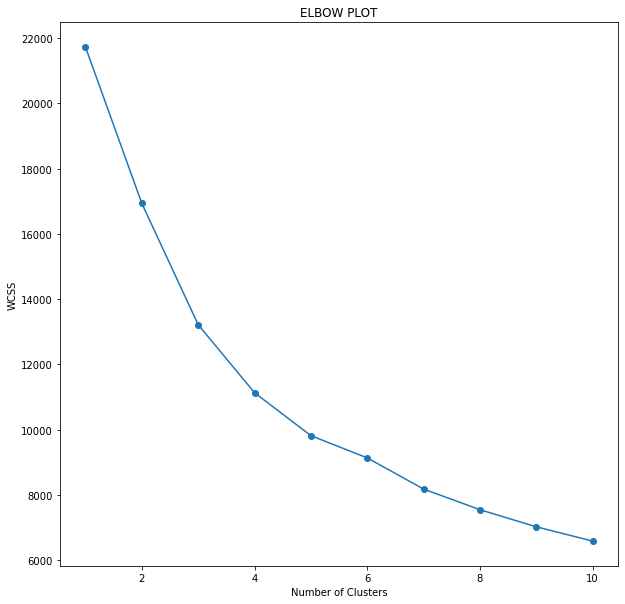

In [71]:
wcss2=[] # Empty list to store wcss

for i in range(1,11):
    km1=cluster.KMeans(n_clusters=i,
                     init='k-means++',
                     n_init=10,
                     max_iter=300,
                     random_state=100)
    km1.fit(df_wo_kmeans)
    wcss2.append(km1.inertia_) #km.inertia_- WCSS

# Plotting the K-means Elbow Plot
plt.figure(figsize=(10,10))
plt.plot(range(1,11),wcss2, marker='o')
plt.title("ELBOW PLOT")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [72]:
k=3
km4=cluster.KMeans(n_clusters=k,
                     init='k-means++',
                     n_init=10,
                     max_iter=300,
                     random_state=100)
km4.fit(df_wo_kmeans)


KMeans(n_clusters=3, random_state=100)

In [73]:
y_kmeans_outlier = km4.fit_predict(df_wo_kmeans)
y_kmeans_outlier

array([1, 1, 0, ..., 0, 1, 0])

In [74]:
labels4_outlier=km4.labels_
labels4_outlier

array([1, 1, 0, ..., 0, 1, 0])

In [75]:
df_wo_kmeans['labels']=labels4_outlier

In [76]:
df_wo_kmeans.head()

AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  FlyingReturnsMiles  \
0   -0.399340   -0.150235     -0.800206     -1.199405           -0.414957   
1   -1.063842   -0.150235     -0.800206     -1.199405           -0.414957   
2   -0.130817    3.373358      0.027542      0.053675           -0.414957   
3   -0.813138   -0.150235     -0.447256      1.933295           -0.414957   
4    2.266102    2.495979     -0.546806     -0.698173            2.526287   

   FlightTrans  EnrollDuration  labels  
0    -0.391769        0.550998       1  
1    -0.391769       -1.903078       1  
2    -0.391769        1.083366       0  
3    -0.391769       -1.238717       1  
4     0.939132       -0.666752       2

In [77]:
df_wo_kmeans['labels']=df_wo_kmeans['labels'].astype('str')
print(df_wo_kmeans['labels'])

0       1
1       1
2       0
3       1
4       2
       ..
3100    1
3101    0
3102    0
3103    1
3104    0
Name: labels, Length: 3105, dtype: object


In [78]:
df_wo_kmeans['labels'].value_counts()

1    1696
0     999
2     410
Name: labels, dtype: int64

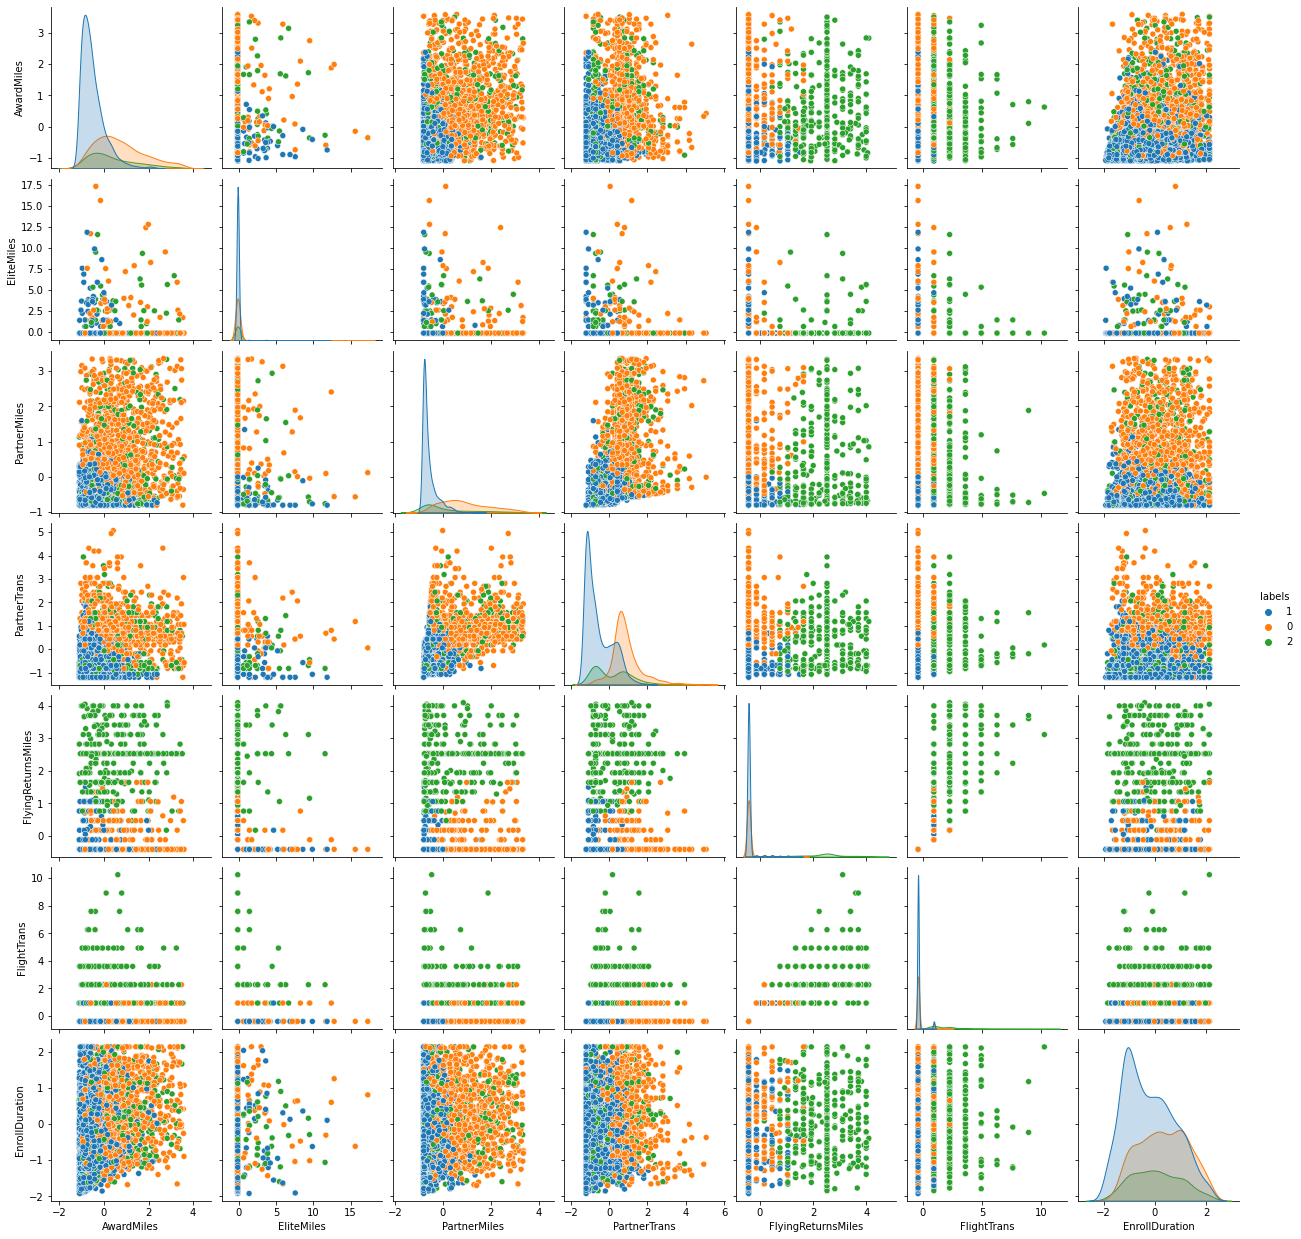

In [79]:
sns.pairplot(df_wo_kmeans, x_vars=features,y_vars=features,hue='labels',diag_kind='kde')
plt.show()

In [80]:
c_df=pd.concat([df_wo[df_wo_kmeans['labels']=='0'].mean(),
              df_wo[df_wo_kmeans['labels']=='1'].mean(),
              df_wo[df_wo_kmeans['labels']=='2'].mean()],
             axis=1)
c_df.columns=['cluster1','cluster2','cluster3']
c_df

cluster1      cluster2      cluster3
AwardMiles          78120.255255  25804.472288  63959.653659
EliteMiles            127.938939     54.670401    189.602439
PartnerMiles        23782.137137   3009.019458  13308.831707
PartnerTrans           16.566567      5.120283     10.941463
FlyingReturnsMiles     12.858859      6.734670    475.029268
FlightTrans             0.097097      0.045991      1.802439
EnrollDuration       4586.985986   3497.305425   4072.812195

In [81]:
customertype=["Gold","Blue","Silver"]
df['labels']=labels4_outlier
df['labels']=df['labels'].map({0:customertype[0],1:customertype[1],2:customertype[2]})

In [82]:
df['labels'].value_counts()

Blue      1696
Gold       999
Silver     410
Name: labels, dtype: int64

<AxesSubplot:xlabel='labels', ylabel='count'>

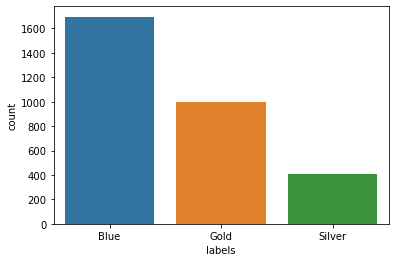

In [83]:
sns.countplot(x='labels',data=df)

## Using PCA for dimensionality reduction

In [84]:
# using the dataset after removing the outliers
df_wo_pca=df.copy()
df_wo_pca

FFP#  AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  \
row_num                                                             
0        1502       30486           0             0             0   
1        3652        1884           0             0             0   
2         815       42044        2253         11433            10   
3        3611       12675           0          4875            25   
4        2657      145214        1692          3500             4   
...       ...         ...         ...           ...           ...   
3100     3962       40346           0          5412            13   
3101     1021       11449           0         24415            11   
3102     1271       71736           0         53602            25   
3103     3227       41247           0             0             0   
3104     2192       56693        3953         20454            11   

         FlyingReturnsMiles  FlightTrans  EnrollDuration  labels  
row_num                                                           
0                         0            0            5051    Blue  
1                         0            0              31    Blue  
2                         0            0            6140    Gold  
3                         0            0            1390    Blue  
4                       500            1            2560  Silver  
...                     ...          ...             ...     ...  
3100                      0            0            1483    Blue  
3101                      0            0            5864    Gold  
3102                     50            1            5485    Gold  
3103                      0            0            2407    Blue  
3104                      0            0            3893    Gold  

[3105 rows x 9 columns]

In [85]:
# Satndardised data set For PCA
df_wo_std_pca=df_norm.copy()
df_wo_std_pca

AwardMiles  EliteMiles  PartnerMiles  PartnerTrans  FlyingReturnsMiles  \
0      -0.399340   -0.150235     -0.800206     -1.199405           -0.414957   
1      -1.063842   -0.150235     -0.800206     -1.199405           -0.414957   
2      -0.130817    3.373358      0.027542      0.053675           -0.414957   
3      -0.813138   -0.150235     -0.447256      1.933295           -0.414957   
4       2.266102    2.495979     -0.546806     -0.698173            2.526287   
...          ...         ...           ...           ...                 ...   
3100   -0.170266   -0.150235     -0.408378      0.429599           -0.414957   
3101   -0.841621   -0.150235      0.967437      0.178983           -0.414957   
3102    0.559009   -0.150235      3.080573      1.933295           -0.120833   
3103   -0.149333   -0.150235     -0.800206     -1.199405           -0.414957   
3104    0.209519    6.032084      0.680661      0.178983           -0.414957   

      FlightTrans  EnrollDuration  
0       -0.391769        0.550998  
1       -0.391769       -1.903078  
2       -0.391769        1.083366  
3       -0.391769       -1.238717  
4        0.939132       -0.666752  
...           ...             ...  
3100    -0.391769       -1.193254  
3101    -0.391769        0.948441  
3102     0.939132        0.763163  
3103    -0.391769       -0.741547  
3104    -0.391769       -0.015101  

[3105 rows x 7 columns]

In [86]:
# Choosing the extent of the variance to be covered
PCA_sklearn=PCA(n_components=0.95)
PCA_sklearn

PCA(n_components=0.95)

In [87]:
features_pca=['PC1','PC2','PC3','PC4','PC5','PC6']

In [88]:
# Applying PCA instance on the Data
data_wo_pca=PCA_sklearn.fit_transform(df_wo_std_pca)
pca_df=pd.DataFrame(data_wo_pca,columns=features_pca)
pca_df

PC1       PC2       PC3       PC4       PC5       PC6
0    -1.320076  0.235401 -0.351561  0.945791  0.139103 -0.233880
1    -2.128925  0.774137  0.380391 -1.263574  0.443485 -0.333174
2     0.120767 -0.362888  2.907392  1.871977 -0.891787 -0.008460
3    -0.300229 -0.609513  0.325386 -1.741747 -0.917539  1.426133
4     1.881097  2.261434  2.320225  0.829924  1.950733  0.305070
...        ...       ...       ...       ...       ...       ...
3100 -0.659055 -0.243362  0.276199 -1.100016  0.209622  0.572919
3101  0.028799 -0.876338 -0.342693  0.338885 -1.149383 -0.773624
3102  3.057828 -1.598221 -0.187771 -0.655401 -1.019267 -0.945788
3103 -1.475934  0.392579  0.054039 -0.098103  0.791402 -0.167096
3104  0.603166 -0.324763  5.801515  1.586178 -0.702611 -0.331245

[3105 rows x 6 columns]

In [89]:
label_df_pca=pca_df.copy()
label_df_pca

PC1       PC2       PC3       PC4       PC5       PC6
0    -1.320076  0.235401 -0.351561  0.945791  0.139103 -0.233880
1    -2.128925  0.774137  0.380391 -1.263574  0.443485 -0.333174
2     0.120767 -0.362888  2.907392  1.871977 -0.891787 -0.008460
3    -0.300229 -0.609513  0.325386 -1.741747 -0.917539  1.426133
4     1.881097  2.261434  2.320225  0.829924  1.950733  0.305070
...        ...       ...       ...       ...       ...       ...
3100 -0.659055 -0.243362  0.276199 -1.100016  0.209622  0.572919
3101  0.028799 -0.876338 -0.342693  0.338885 -1.149383 -0.773624
3102  3.057828 -1.598221 -0.187771 -0.655401 -1.019267 -0.945788
3103 -1.475934  0.392579  0.054039 -0.098103  0.791402 -0.167096
3104  0.603166 -0.324763  5.801515  1.586178 -0.702611 -0.331245

[3105 rows x 6 columns]

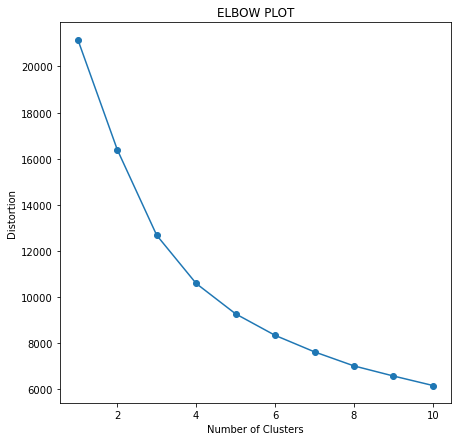

In [90]:
wcss_pca=[]

for i in range(1,11):
    km=cluster.KMeans(n_clusters=i,
                     init='k-means++',
                     n_init=10,
                     max_iter=300,
                     random_state=100)
    km.fit(pca_df.values)
    wcss_pca.append(km.inertia_)
    
# plotting the k-Means Elbow Plot
plt.figure(figsize=(7,7))
plt.plot(range(1,11), wcss_pca,marker='o')
plt.title("ELBOW PLOT")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.show()

### K- Means Clustering at K=3

In [91]:
k=3
km_pca=cluster.KMeans(n_clusters=k,
                     init='k-means++',
                     n_init=10,
                     max_iter=300,
                     random_state=100)
km_pca.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [92]:
labels_pca=km_pca.labels_
labels_pca

array([0, 0, 2, ..., 2, 0, 2])

In [93]:
pca_df['labels']=labels_pca
pca_df.head()

PC1       PC2       PC3       PC4       PC5       PC6  labels
0 -1.320076  0.235401 -0.351561  0.945791  0.139103 -0.233880       0
1 -2.128925  0.774137  0.380391 -1.263574  0.443485 -0.333174       0
2  0.120767 -0.362888  2.907392  1.871977 -0.891787 -0.008460       2
3 -0.300229 -0.609513  0.325386 -1.741747 -0.917539  1.426133       0
4  1.881097  2.261434  2.320225  0.829924  1.950733  0.305070       1

In [94]:
pca_df['labels']=pca_df['labels'].astype('str')
print(pca_df['labels'])

0       0
1       0
2       2
3       0
4       1
       ..
3100    0
3101    2
3102    2
3103    0
3104    2
Name: labels, Length: 3105, dtype: object


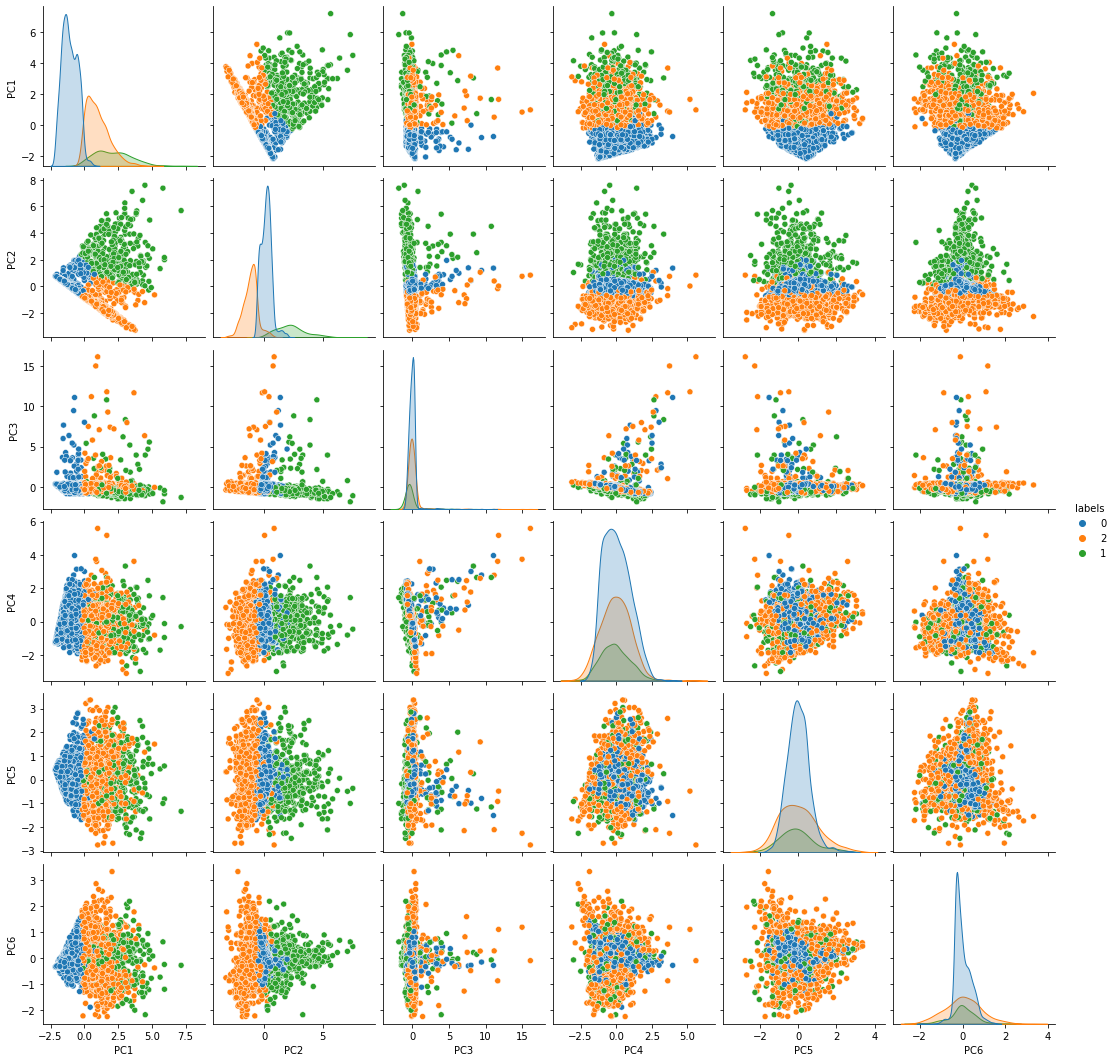

In [95]:
sns.pairplot(pca_df,x_vars=features_pca,y_vars=features_pca,hue='labels')
plt.show()

In [96]:
c_df=pd.concat([label_df_pca[pca_df['labels']=='0'].mean(),
                label_df_pca[pca_df['labels']=='1'].mean(),
               label_df_pca[pca_df['labels']=='2'].mean()],
              axis=1)
c_df.columns=['cluster1','cluster2','cluster3']
c_df

cluster1  cluster2  cluster3
PC1 -1.087968  2.091187  0.992095
PC2  0.142078  2.337078 -1.189776
PC3 -0.012519 -0.186804  0.097068
PC4  0.045046 -0.080208 -0.043665
PC5  0.004424 -0.060668  0.017154
PC6 -0.002775 -0.024706  0.014732

- cluster1- PC1 is lowest of all cluster- Blue
- cluster2- All PC1 are the highest - Gold
- cluster3- Pc1 between the 2 clusters - Silver

In [97]:
custtype_pca=["Blue","Gold","Silver"]
label_df_pca['labels']=labels_pca
label_df_pca['labels']=label_df_pca['labels'].map({0:custtype_pca[0],1:custtype_pca[1],2:custtype_pca[2]})

In [98]:
label_df_pca

PC1       PC2       PC3       PC4       PC5       PC6  labels
0    -1.320076  0.235401 -0.351561  0.945791  0.139103 -0.233880    Blue
1    -2.128925  0.774137  0.380391 -1.263574  0.443485 -0.333174    Blue
2     0.120767 -0.362888  2.907392  1.871977 -0.891787 -0.008460  Silver
3    -0.300229 -0.609513  0.325386 -1.741747 -0.917539  1.426133    Blue
4     1.881097  2.261434  2.320225  0.829924  1.950733  0.305070    Gold
...        ...       ...       ...       ...       ...       ...     ...
3100 -0.659055 -0.243362  0.276199 -1.100016  0.209622  0.572919    Blue
3101  0.028799 -0.876338 -0.342693  0.338885 -1.149383 -0.773624  Silver
3102  3.057828 -1.598221 -0.187771 -0.655401 -1.019267 -0.945788  Silver
3103 -1.475934  0.392579  0.054039 -0.098103  0.791402 -0.167096    Blue
3104  0.603166 -0.324763  5.801515  1.586178 -0.702611 -0.331245  Silver

[3105 rows x 7 columns]

<AxesSubplot:xlabel='labels', ylabel='count'>

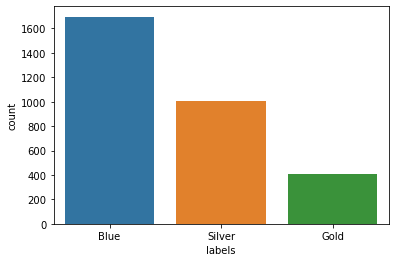

In [99]:
sns.countplot(x='labels',data=label_df_pca)

In [100]:
label_df_pca['labels'].value_counts()

Blue      1696
Silver    1002
Gold       407
Name: labels, dtype: int64

## Evaluation of the Model

#### K Means Clustering with Outliers

In [101]:
data1['labels'].value_counts()

Blue      2672
Silver    1169
Gold       158
Name: labels, dtype: int64

<AxesSubplot:xlabel='labels', ylabel='count'>

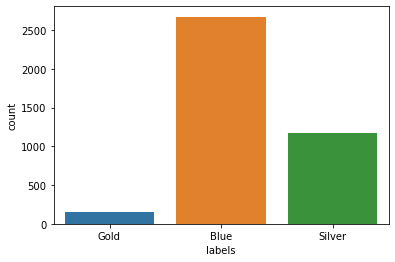

In [102]:
sns.countplot(x='labels',data=data1)

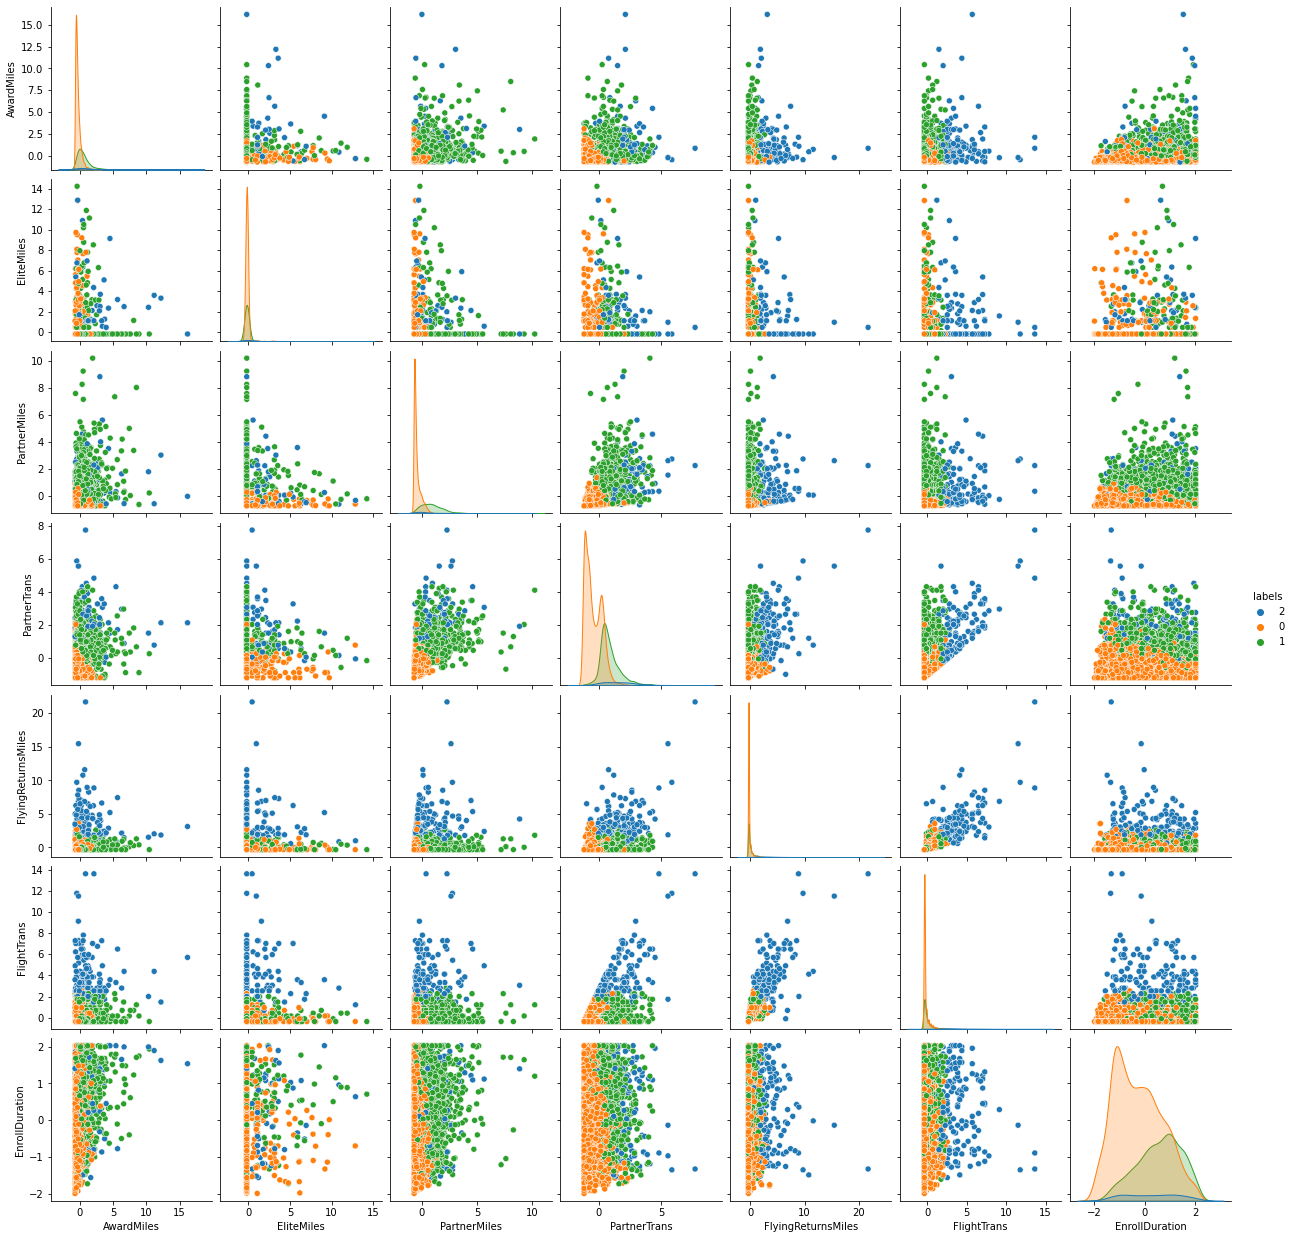

In [103]:
sns.pairplot(data2, x_vars=features,y_vars=features,hue='labels',diag_kind='kde')
plt.show()

#### Hierarchical clustering 

In [107]:
data_label_hr['labels'].value_counts()

Blue      1801
Silver    1737
Gold       461
Name: labels, dtype: int64

<AxesSubplot:xlabel='labels', ylabel='count'>

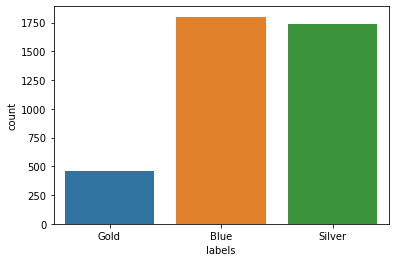

In [105]:
sns.countplot(x='labels',data=data_label_hr)

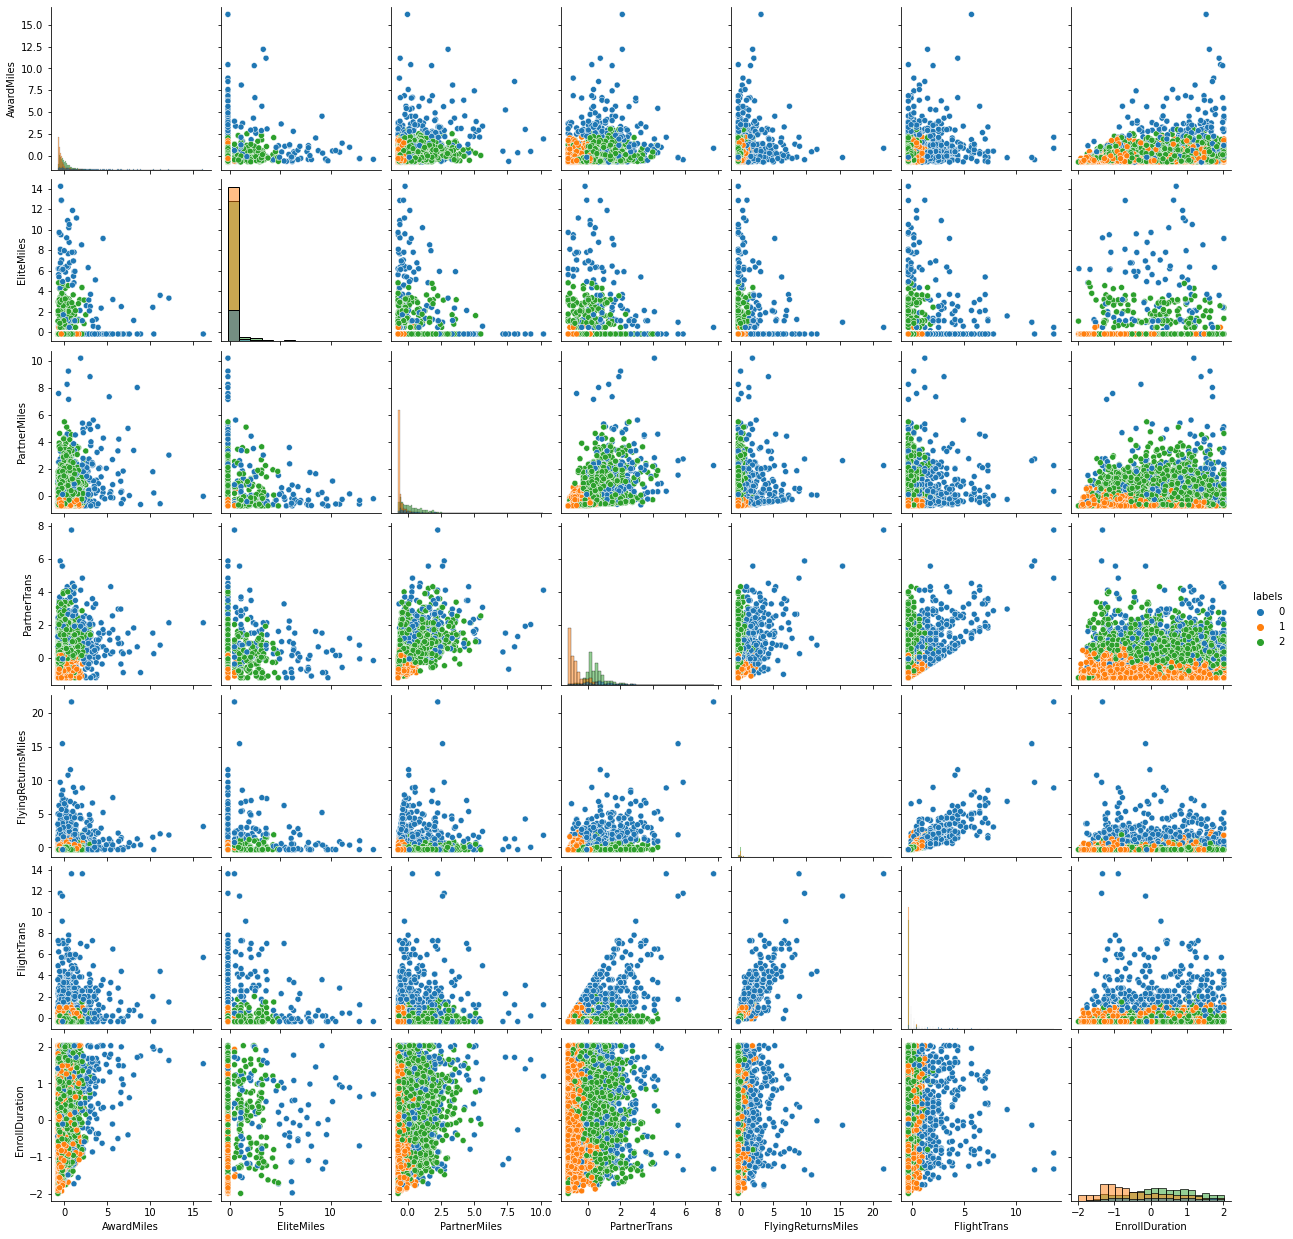

In [106]:
sns.pairplot(data_hr, x_vars=features,y_vars=features,hue='labels',diag_kind='hist')
plt.show()

#### K Means without Outliers

In [108]:
df['labels'].value_counts()

Blue      1696
Gold       999
Silver     410
Name: labels, dtype: int64

<AxesSubplot:xlabel='labels', ylabel='count'>

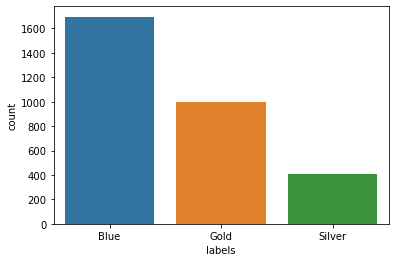

In [109]:
sns.countplot(x='labels',data=df)

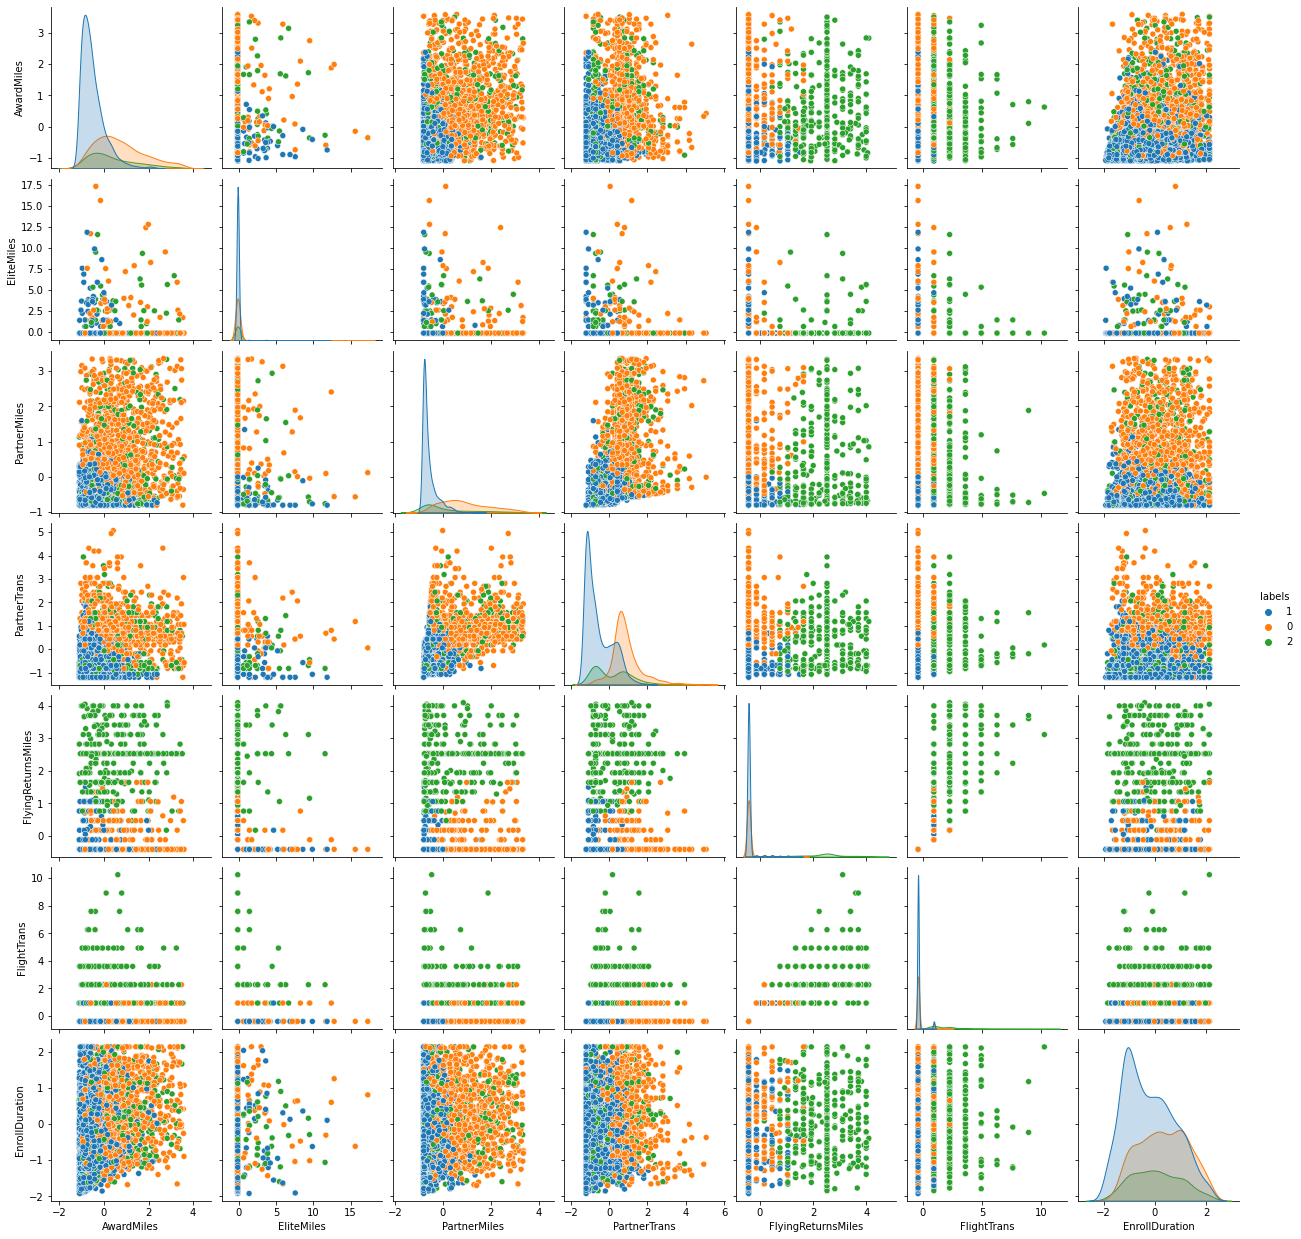

In [110]:
sns.pairplot(df_wo_kmeans, x_vars=features,y_vars=features,hue='labels',diag_kind='kde')
plt.show()

#### K Means after treating outliers and applyong PCA

In [112]:
label_df_pca['labels'].value_counts()

Blue      1696
Silver    1002
Gold       407
Name: labels, dtype: int64

<AxesSubplot:xlabel='labels', ylabel='count'>

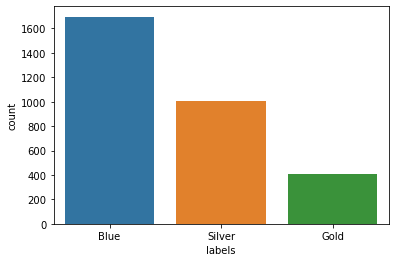

In [111]:
sns.countplot(x='labels',data=label_df_pca)

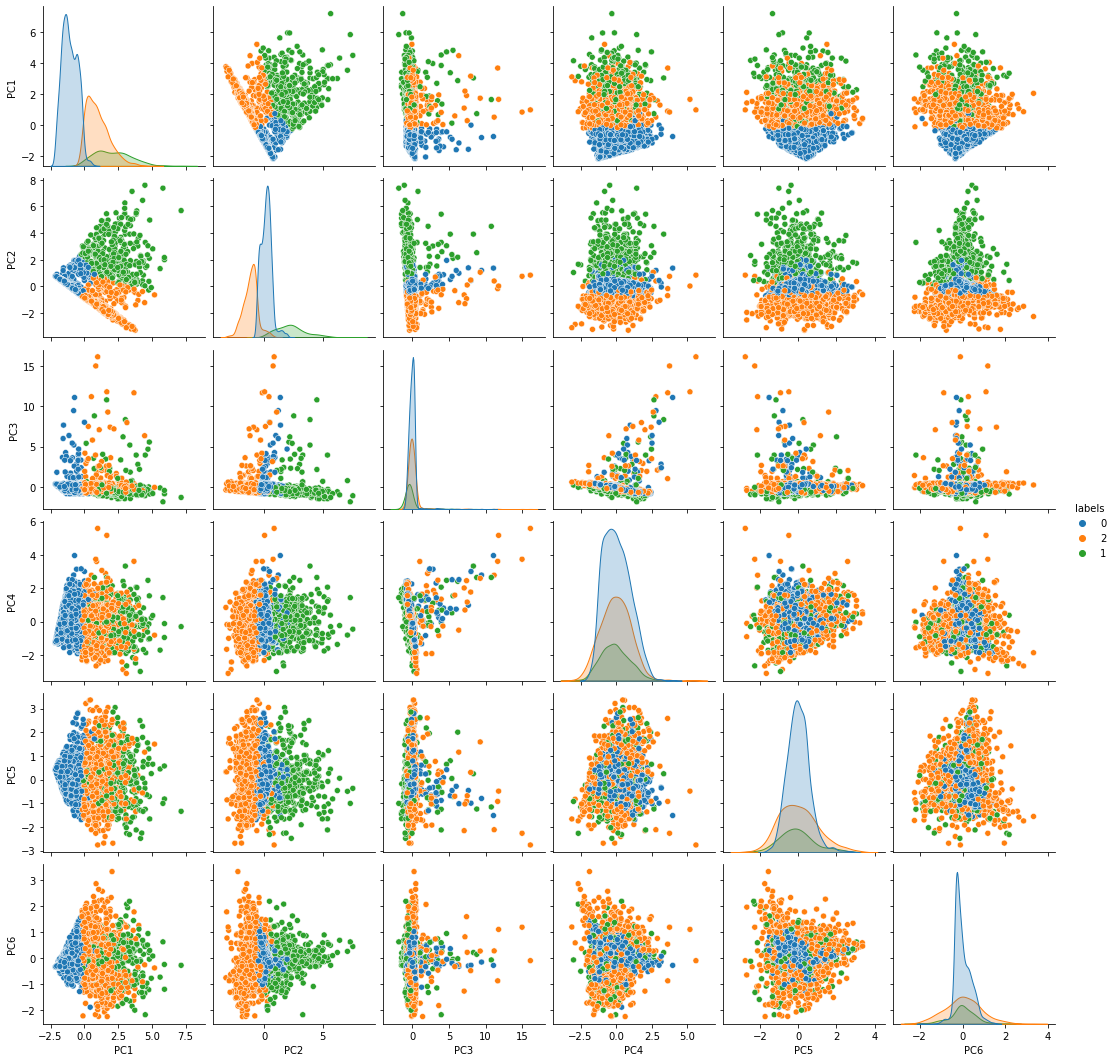

In [113]:
sns.pairplot(pca_df,x_vars=features_pca,y_vars=features_pca,hue='labels')
plt.show()

If we refer back to our the pairplots of all the models the model after treating outliers and applying PCA gives a spherical clusters with total of three clusters.

### Inference:-
Blue Catergory-
* This catergory does not have frequent flight and not much use of Partner servies and may mostly be econmoy class travellers .
* This Catergory covers 54% of the customer segment.
* NZ Airlines should focus on some good offers of FFP so that customers in this category should avial more and more services.

Silver Catergory-
* This category is the frequent flying group of all the three categories.
* But they have less of PartnerTrans and PartnerMiles although their FlightTrans and FlyingReturnsMiles is high.
* Airlines should focus more in FFP with offers in Partner Services for this catergoy as it covers 32% of the group in the given data.

Gold Catergory- 
* This category 13% of the customer segment.
* But they are not frequent flier group but probably they are international travellers as a result their AwardMiles are the highest.
* Airlines should come up with good FFP offer for international travels for this category so that they avail more such travels from the Airlines.
